<a href="https://colab.research.google.com/github/nguepigit2020/AMMI-REPOSITORY/blob/main/Idriss_Nguepi_Take_home_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils import clip_grad_norm_
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import glob
import matplotlib.pyplot as plt

### Download the data

In [3]:
#Downkoad the data
!wget https://surfdrive.surf.nl/files/index.php/s/LDwpIdG7HHkQiOs/download

--2023-06-15 22:28:35--  https://surfdrive.surf.nl/files/index.php/s/LDwpIdG7HHkQiOs/download
Resolving surfdrive.surf.nl (surfdrive.surf.nl)... 145.100.27.67, 145.107.56.140, 145.107.8.140, ...
Connecting to surfdrive.surf.nl (surfdrive.surf.nl)|145.100.27.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 259396 (253K) [application/zip]
Saving to: ‘download’

download            100%[===================>] 253.32K   306KB/s    in 0.8s    

2023-06-15 22:28:37 (306 KB/s) - ‘download’ saved [259396/259396]



In [4]:
#Unzip the data
!unzip '/content/download'

Archive:  /content/download
   creating: dataset/
  inflating: dataset/products-data-0.tsv  
  inflating: dataset/products-data-1.tsv  
  inflating: dataset/products-data-2.tsv  
  inflating: dataset/products-data-3.tsv  
  inflating: dataset/reviews-0.tsv   
  inflating: dataset/reviews-1.tsv   
  inflating: dataset/reviews-2.tsv   
  inflating: dataset/reviews-3.tsv   


#### Merge all the dataset to have only one dataset

In [5]:
# import pandas as pd
# import os

# directory = '/content/dataset/'
# files = os.listdir(directory)
# dataframes = []

# for i in range(4):
#   print(i)
#   product_df = pd.read_csv(directory+'products-data-{0}.tsv'.format(i),sep='\t',names=["id", "category", "product title"])
#   product_df.head()
#   reviews_df = pd.read_csv(directory+'reviews-{0}.tsv'.format(i),sep='\t',names=["id","review_text","rating"])
#   reviews_df.head()
#   merged_df = pd.merge(product_df, reviews_df,on='id')
#   dataframes.append(merged_df)
#   print(len(dataframes))
# merged_df.head(20)


In [141]:
directory = '/content/dataset/'

product_df0 = pd.read_csv(directory+'products-data-0.tsv',sep='\t',names=["id", "category", "product title"])
reviews_df0 = pd.read_csv(directory+'reviews-0.tsv',sep='\t',names=["id","rating","review_text",])
merged_df0 = pd.merge(product_df0, reviews_df0,on='id')
merged_df0.head()

,id,category,product title,rating,review_text
0,daa54754-af9c-41c0-b542-fe5eabc5919c,Kitchen,Bodum Travel Press 12-Ounce French Press Coffe...,5,Great!
1,ab602aca-9bad-4aa9-bd42-6ce24cdf8680,Kitchen,RH Forschner by Victorinox BladeSafe for Knife...,5,It fit perfectly on my new<br />Victorinox Fib...
2,f98cd8d3-d6fe-4ee3-8c9f-a18c1690f7a6,Kitchen,Bellemain 12-Cup Nonstick Madeleine Pan,5,Excellent pan - my daughter just made madelein...
3,396f73e3-e3ef-4c93-a4b7-e8b04c6a2223,Jewelry,8mm Heat Treated Agate Beads Tibetan Buddhist ...,3,not the good one but not bad
4,329ed5e3-8b47-4e78-961b-18b89e7da808,Jewelry,2.50 Ct Oval Black Onyx 925 Sterling Silver Pe...,1,This is a rip off. It only comes with this nec...


In [142]:
product_df1 = pd.read_csv(directory+'products-data-1.tsv',sep='\t',names=["id", "category", "product title"])
reviews_df1 = pd.read_csv(directory+'reviews-1.tsv',sep='\t',names=["id","rating","review_text",])
merged_df1 = pd.merge(product_df1, reviews_df1,on='id')
merged_df1.head()

,id,category,product title,rating,review_text
0,d242fdc9-772b-4d97-94bb-dabdec22ebe7,Kitchen,iCooker® Amazing Happy Birthday Candles + FREE...,5,Worked like a charm! Everyone was amazed by th...
1,05d4b845-1772-4f02-8dcc-b0ef4c1e06f8,Kitchen,"Norpro 3080 Mini Measuring Spoons, 5 Piece Set",5,These are super fun! Easy to figure out true ...
2,b848c565-1a0b-4810-9dfc-9a537cfedcbf,Jewelry,Accessory Accomplice Silvertone Guardian Angel...,3,I liked it but it is too big. Beautiful piece...
3,ae56ebfe-0abf-4a55-88fc-d838b834d4ae,Kitchen,Hamilton Beach 64650 6-Speed Classic Stand Mix...,5,This is great. I use it all the time.
4,1646a66b-4a17-4a88-86fc-d051047c0a60,Jewelry,CHEEK JEWELRY 16g Internally Threaded Labret P...,5,Lol.. ppl look 👆read the description.. it clea...


In [143]:
product_df2 = pd.read_csv(directory+'products-data-2.tsv',sep='\t',names=["id", "category", "product title"])
reviews_df2 = pd.read_csv(directory+'reviews-2.tsv',sep='\t',names=["rating","id","review_text"])
merged_df2 = pd.merge(product_df2, reviews_df2,on='id')
merged_df2.head(10)

,id,category,product title,rating,review_text
0,d95bbe28-71ea-4b9a-8a3b-77d245766963,Kitchen,BELLA LINEA 2 Slice Toaster with Extra Wide Sl...,5,Works perfectly!
1,88ca9249-c177-405a-b744-2e351a94fcb8,Kitchen,Now Designs Butter Dish,2,Too heavy and over-sized. The quality is low
2,21910122-3676-4150-b1b0-256868a634b8,Kitchen,Black & Decker T4569B 4 Slice Toaster - Black,5,item as described
3,290296ea-0206-4d0b-b7e7-0c3c2609c13e,Kitchen,Kosma Stainless Steel Fish Tray | Serving Tray...,2,This is very light weight. Almost like a disp...
4,1fef9581-799b-4ec1-90f8-c48c506376a0,Kitchen,Penguin Chef Spoon Holder,5,"Looks great in my kitchen, I love penguins......."
5,ab42b690-be52-40b5-a4ea-28e88e47df0e,Jewelry,ORIGIA Handcraft Malachite Stone Bead Strand N...,5,I like this Malachite bead strand. Thank you f...
6,f91b02d0-0525-4ea3-a9d7-d658ec8c08b5,Jewelry,Stainless steel 4.5 in and 27 in.military dog ...,5,perfect for my sons medical tags..
7,651e7abf-1efe-4864-9650-718b156ff1d4,Kitchen,Presto Stainless Steel Deep Fryer,4,Perfect size for cooking for 1 or 2 people. An...
8,540d0439-3b80-477b-a05c-420845724217,Jewelry,KONOV Mens Vintage Angel Wing Cross Pendant Br...,5,I ordered this for my husband and he really lo...
9,52fa758f-dea8-47c9-962a-6bdc704e4314,Kitchen,Ozeri Pronto Digital Multifunction Kitchen and...,5,Good size and accurate. I've been wanting a sc...


In [144]:
product_df3 = pd.read_csv(directory+'products-data-3.tsv',sep='\t',names=["id", "category", "product title"])
reviews_df3 = pd.read_csv(directory+'reviews-3.tsv',sep='\t',names=["id","rating","review_text",])
merged_df3 = pd.merge(product_df3, reviews_df3,on='id')
merged_df3.head(10)

,id,category,product title,rating,review_text
0,4867f4fd-8943-4982-9ad8-4166182992ca,Ktchen,Zwilling J.A. Henckels Twin Four Star II Meat ...,5,Terrific Cleaver.
1,860a585a-7df5-484c-8331-2d2f57f11948,Ktchen,Pyrex 3-Piece Glass Measuring Cup Set,5,Bought these for use with essential oils and m...
2,09d08220-7f1b-43f5-ab9c-9d70333bd831,Jewelry,INBLUE Men's Stainless Steel Ring Band Silver ...,5,Awesome ring.
3,b2802cae-3ff9-461b-9fe1-546b5287ae15,Jewelry,Bestpriceam (TM) Chunky Clear Crystal Statemen...,2,Not what I was expecting.. and way smaller
4,9455018c-a41c-4d57-8f52-6672e23fd879,Ktchen,Nut Grinder Table Top Mounted s/s 20cm,5,Bought this for my dad who likes &#34;old scho...
5,cfc66795-e9e3-4fa3-b59e-ad90bb113719,Ktchen,Pint Glass set of (6) Additional Colors Availa...,2,I gave these as a gift. The glasses themselve...
6,d2d88575-d803-4df9-9c7a-f581c343bac8,Ktchen,"Ziploc Vacuum Pump Refill Bags, Quart Size, 12...",5,These bags are wonderful! They are great for ...
7,a2364dad-c4a9-4740-b033-575ac28ca327,Ktchen,EatSmart Precision Pro Digital Kitchen Scale,1,I've had this scale for about 6 months and it'...
8,4918d18b-2c32-45e6-947e-04328d1fc016,Jewelry,HotVally Animal Halloween Pacboy&Nogr Silver C...,5,They are awesome !!!! The gift is loved!
9,ddd7c9cc-7099-407a-9de3-8123b5b38062,Ktchen,"Culina Kitchen Scissors 8"" Heavy-Duty Come-Apa...",4,These are great scissors and they feel like th...


In [145]:
full_dataset = pd.concat([merged_df0,merged_df1,merged_df2,merged_df3])
full_dataset.head()

,id,category,product title,rating,review_text
0,daa54754-af9c-41c0-b542-fe5eabc5919c,Kitchen,Bodum Travel Press 12-Ounce French Press Coffe...,5,Great!
1,ab602aca-9bad-4aa9-bd42-6ce24cdf8680,Kitchen,RH Forschner by Victorinox BladeSafe for Knife...,5,It fit perfectly on my new<br />Victorinox Fib...
2,f98cd8d3-d6fe-4ee3-8c9f-a18c1690f7a6,Kitchen,Bellemain 12-Cup Nonstick Madeleine Pan,5,Excellent pan - my daughter just made madelein...
3,396f73e3-e3ef-4c93-a4b7-e8b04c6a2223,Jewelry,8mm Heat Treated Agate Beads Tibetan Buddhist ...,3,not the good one but not bad
4,329ed5e3-8b47-4e78-961b-18b89e7da808,Jewelry,2.50 Ct Oval Black Onyx 925 Sterling Silver Pe...,1,This is a rip off. It only comes with this nec...


In [146]:
full_dataset.shape

(1754, 5)

In [147]:
# Check null value
full_dataset.isnull().sum()

id               0
category         0
product title    0
rating           0
review_text      0
dtype: int64

In [148]:
# Check Nan value
full_dataset.isna().sum()

id               0
category         0
product title    0
rating           0
review_text      0
dtype: int64

### Merging the product and review dataset 

In [149]:
# Perform the merge based on a common key column
full_dataset = full_dataset.rename(columns={'category':'label','product title':'product_title'})
full_dataset['label'] = full_dataset['label'].map({'Kitchen':0,'Jewelry':1})
# Combine the product_title and review_text into a single column
full_dataset['combined_text'] = full_dataset['product_title'] + ' ' + full_dataset['review_text']
full_dataset = full_dataset[['product_title','rating','review_text','label','combined_text']]
full_dataset.head()

,product_title,rating,review_text,label,combined_text
0,Bodum Travel Press 12-Ounce French Press Coffe...,5,Great!,0.0,Bodum Travel Press 12-Ounce French Press Coffe...
1,RH Forschner by Victorinox BladeSafe for Knife...,5,It fit perfectly on my new<br />Victorinox Fib...,0.0,RH Forschner by Victorinox BladeSafe for Knife...
2,Bellemain 12-Cup Nonstick Madeleine Pan,5,Excellent pan - my daughter just made madelein...,0.0,Bellemain 12-Cup Nonstick Madeleine Pan Excell...
3,8mm Heat Treated Agate Beads Tibetan Buddhist ...,3,not the good one but not bad,1.0,8mm Heat Treated Agate Beads Tibetan Buddhist ...
4,2.50 Ct Oval Black Onyx 925 Sterling Silver Pe...,1,This is a rip off. It only comes with this nec...,1.0,2.50 Ct Oval Black Onyx 925 Sterling Silver Pe...


In [153]:
full_dataset = full_dataset.dropna(subset=['label'])
full_dataset.shape

(1620, 5)

In [154]:
full_dataset

,product_title,rating,review_text,label,combined_text
0,Bodum Travel Press 12-Ounce French Press Coffe...,5,Great!,0.0,Bodum Travel Press 12-Ounce French Press Coffe...
1,RH Forschner by Victorinox BladeSafe for Knife...,5,It fit perfectly on my new<br />Victorinox Fib...,0.0,RH Forschner by Victorinox BladeSafe for Knife...
2,Bellemain 12-Cup Nonstick Madeleine Pan,5,Excellent pan - my daughter just made madelein...,0.0,Bellemain 12-Cup Nonstick Madeleine Pan Excell...
3,8mm Heat Treated Agate Beads Tibetan Buddhist ...,3,not the good one but not bad,1.0,8mm Heat Treated Agate Beads Tibetan Buddhist ...
4,2.50 Ct Oval Black Onyx 925 Sterling Silver Pe...,1,This is a rip off. It only comes with this nec...,1.0,2.50 Ct Oval Black Onyx 925 Sterling Silver Pe...
...,...,...,...,...,...
246,Pair of 00 Gauge Gold IP Large .357 Bullet Sur...,5,These look amazong and fit properly. Do not fa...,1.0,Pair of 00 Gauge Gold IP Large .357 Bullet Sur...
247,Sterling Silver 060-Gauge Diamond-Cut Bracelet,5,"Very pretty, have worn it non-stop since I got...",1.0,Sterling Silver 060-Gauge Diamond-Cut Bracelet...
250,Leather Bracelet Cuff Rhinestone Cross and Edg...,2,Snap broke before I even wore it,1.0,Leather Bracelet Cuff Rhinestone Cross and Edg...
251,GULICX White Gold Tone Shining Radiant White C...,5,"Love the BLACK color, and the setting is beaut...",1.0,GULICX White Gold Tone Shining Radiant White C...


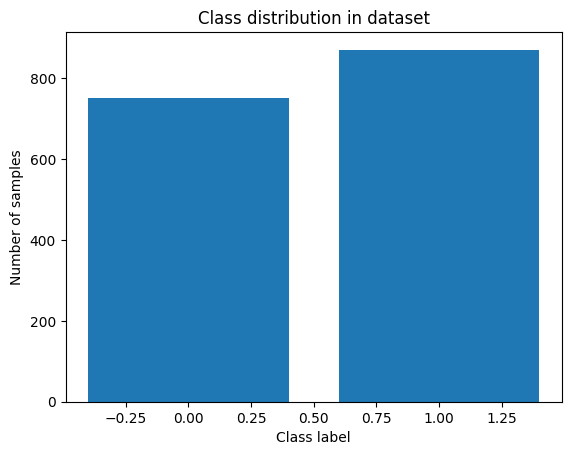

In [155]:
# Assume that y is a list or array containing the class labels of your dataset
full_dataset['label'].fillna(0.0, inplace=True)
unique_labels, counts = np.unique(full_dataset['label'], return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()

## Model definition using pytorch

In [167]:
# Define the logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim+1, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x,rating):
        rating = rating.unsqueeze(1)
        combined = torch.cat((x, rating), dim=1)
        out = self.linear(combined)
        out = self.sigmoid(out)
        return out

In [168]:
# Define the dataset class
class MyDataset(Dataset):
    def __init__(self, texts, targets,ratings, vectorizer):
        self.texts = texts
        self.targets = targets
        self.ratings = ratings
        self.vectorizer = vectorizer

    def __getitem__(self, index):
      if index < 0 or index >= len(self.texts):
          raise IndexError("Index out of range")

      text = self.texts.iloc[index]
      target = self.targets.iloc[index]
      rating = self.ratings.iloc[index]

      vector = self.vectorizer.transform([text]).toarray()[0]
      x = torch.tensor(vector, dtype=torch.float32)
      r = torch.tensor(rating, dtype=torch.int64)
      y = torch.tensor(target, dtype=torch.int64)

      return x, y, r

    def __len__(self):
        return len(self.texts)

In [169]:
# Load and preprocess the dataset
df = full_dataset
X = df['combined_text']
r = df['rating']
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test,r_train,r_test = train_test_split(X, y,r, test_size=0.2, random_state=42)

# Initialize the BoW vectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_bow = vectorizer.fit_transform(X_train)

# Transform the testing data using the fitted vectorizer
X_test_bow = vectorizer.transform(X_test)

In [170]:
# Create the datasets and data loaders
train_dataset = MyDataset(X_train, y_train, r_train, vectorizer)
test_dataset = MyDataset(X_test, y_test, r_test, vectorizer)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [177]:
# Set the input and output dimensions
input_dim = X_train_bow.shape[1]
output_dim = len(df['label'].unique())
num_epochs = 10

# Initialize the logistic regression model
model = LogisticRegressionModel(input_dim, output_dim)
model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())



In [178]:
def train_model(model, criterion, optimizer, train_loader, num_epochs,device):
    model.train()
    for epoch in range(num_epochs):
      total_loss = 0
      for inputs, targets, ratings in train_loader:
          ratings = ratings.to(device)
          inputs = inputs.to(device)
          targets = targets.to(device)

          optimizer.zero_grad()
          outputs = model(inputs,ratings)
          loss = criterion(outputs, targets)
          loss.backward()
          clip_grad_norm_(model.parameters(), max_norm=1)
          optimizer.step()

          total_loss += loss.item()

      # Calculate the average loss
      avg_loss = total_loss / len(train_loader)
      print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}")

In [220]:
# Evaluation
def evaluate_model(model, criterion, data_loader,device):
    # Evaluate on the test set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets,ratings in test_loader:
            ratings = ratings.to(device)
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs = model(inputs,ratings)
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            # Calculate the total numbers of correct prediction
            correct += (predicted == targets).sum().item()

    # Calculate the accuracy
    accuracy = correct / total

    # Print the loss and accuracy for each epoch
    print(f"Epoch {epoch+1}: , Accuracy = {accuracy:.4f}")

In [ ]:
# Train the model
train_model(model, criterion, optimizer, train_loader, num_epochs,device)

# Evaluate the model on the test set
evaluate_model(model, criterion, test_loader,device)

In [183]:
review_text = full_dataset['product_title'].iloc[0] + full_dataset['review_text'].iloc[0]
rating = full_dataset['rating'].iloc[0]

# Convert the review to a BoW (Bag of Word) vector
vector = vectorizer.transform([review_text]).toarray()[0]

# Convert to a tensor
x = torch.tensor(vector, dtype=torch.float32).unsqueeze(0)
rating = torch.tensor(rating,dtype=torch.float32).unsqueeze(0)

# Make a prediction using the trained model
model.eval()
with torch.no_grad():
    x = x.to(device)
    rating = rating.to(device)
    output = model(x,rating)
predicted_class = 'Kitchen' if torch.argmax(output).item()==0 else 'Jewelry'

print("Predicted Class:", predicted_class)


Predicted Class: Kitchen


<center><h1>******************* End ***************************<h1/><center/>